<h1 align=\"center\"><font color='green'><font size=\"6\"></font>Support Vector Machines (SVMs) </h1>

<div style="background-color: #90EE90;">.</div>  </div>

 - Support Vector Machines (SVMs) are a type of supervised machine learning algorithm used primarily for classification tasks. 
  - They work by finding a hyperplane that separates data points into different classes with the maximum possible margin.

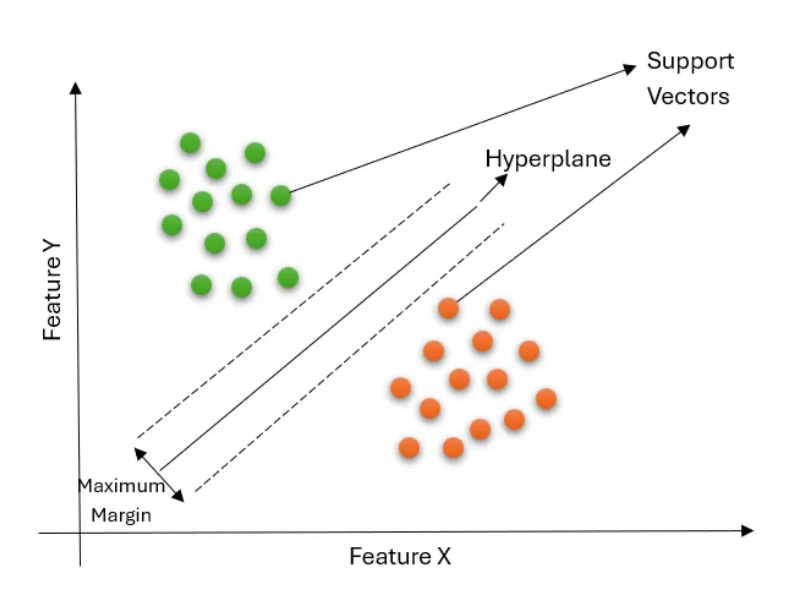

In [1]:
#Hyperplane: A decision boundary that separates data points into different classes.
#Margin: The distance between the hyperplane and the nearest data points from each class.
#Support vectors: The data points that lie closest to the hyperplane and define it.

#### Applications 
- Image classification: Identifying objects or scenes in images.
 - Text classification: Categorizing text documents into different topics or labels.
 - Bioinformatics: Predicting protein structures or gene functions.
 - Anomaly detection: Identifying unusual data points.

In [2]:
#importing necessary libraries and algorithms
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC #SVC stands for Support Vector Classifier
#SVC is a variant of SVM specifically tailored for classification.
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
#creating a synthetic dataset to predict diabetic people based on age, blood sugar and insulin level
np.random.seed(42)
data_size = 150

age = np.random.randint(25,70, size = data_size)
blood_sugar = np.random.randint(110,170, size = data_size)
insulin_level = np.random.randint(75,110, size = data_size)
diabetes = np.random.choice([0,1], size = data_size)  
# 0 for people with diabetes, 1 for people without diabetes

data = {'age': age,
        'blood_sugar': blood_sugar,
        'insulin_level': insulin_level,
        'diabetes': diabetes} 


In [4]:
#creating a dataframe of the dataset 
sugar = pd.DataFrame(data)
sugar.head()


,age,blood_sugar,insulin_level,diabetes
0,63,124,76,0
1,53,152,75,0
2,39,138,86,0
3,67,145,79,1
4,32,122,106,1


In [5]:
#Splitting the dataset into features (age, blood sugar and insulin level) and target (diabetes).
# Assigning columns to Features(X) and target(y) 
X = sugar[['age', 'blood_sugar', 'insulin_level']]
y = sugar['diabetes']

In [6]:
#Performing an 90/10 split to create training and test datasets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [7]:
#Standardizing the features (SVM is sensitive to the scale of data)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
#Initializing the SVM model with a linear kernel
svm_model = SVC(kernel='linear', random_state=42)

In [9]:
#Training the model
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [10]:
#Making predictions
y_pred = svm_model.predict(X_test_scaled)
y_pred

array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1])

In [11]:
#Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [12]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.4
Confusion Matrix:
[[2 6]
 [3 4]]
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.25      0.31         8
           1       0.40      0.57      0.47         7

    accuracy                           0.40        15
   macro avg       0.40      0.41      0.39        15
weighted avg       0.40      0.40      0.38        15



In [13]:
#Applying model on new data
new_data = np.array([[63,110,76]])
predict_data = svm_model.predict(new_data)

print(f"A person of age 63 with blood sugar of 110 & insulin level of 76 will have:{predict_data} diabetes")

A person of age 63 with blood sugar of 110 & insulin level of 76 will have:[1] diabetes


In [15]:
new_data = np.array([[33,110,96]])
predict_data = svm_model.predict(new_data)

print(f"A person of age 33 with blood sugar of 110 & insulin level of 96 will have:{predict_data} diabetes")

A person of age 33 with blood sugar of 110 & insulin level of 96 will have:[0] diabetes
